In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.style as style

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
from kmodes.kmodes import KModes

In [2]:
data = pd.read_csv('dataset/IST_corrected.csv')

C:\Users\Joseash\AppData\Local\Temp\ipykernel_7652\3051754986.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset/IST_corrected.csv')


# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Dataset Variable to Use</p>


#### Age in Years
* a. Age in years rounded = AGE

#### Gender of patient
* a. Gender = SEX

#### Deficiences Noted
* a.Face Deficit = RDEF1
* b.Arm or Hand Deficit = RDEF2
* c.Leg or Foot Deficiency = RDEF3 
* d.Dysphasia = RDEF4
* e.Hemianophia = RDEF5
* f.Visuospatial Disorder = RDEF6
* g.Brainstem/cerebellar signs = RDEF7
* h.Other deficit (Y/N/C=can't assess) = RDEF8

#### Other Observed Upon Initial Diagnosis
* a. Conscious state at randomisation (F - fully alert, D - drowsy, U -unconscious) = RCONSC
* b. Infarct visible on CT (Y/N) = RVISINF
* c. Systolic blood pressure at randomisation (mmHg) = RSBP

##### Final diagnosis of initial event
* a.Ischaemic stroke = DDIAGISC
* b.Haemorrhagic stroke = DDIAGHA

##### Stroke Subtype
* a.Partial anterior circulation syndrome = STYPE
* b.lacunar syndrome = STYPE
* c.Posterior circulation syndrome = STYPE
* d.Total anterior circulation syndrome = STYPE
* e.Other = STYPE

##### Other events within 14 days:
* a.Pulmonary embolism = DPE
* b.Indicator of deep vein thrombosis on discharge form = DVT14
* c.Ischaemic recurrent stroke = DRSISC
* d.Haemorrhagic recurrent stroke = DRSH

##### Medication within 14 days:
* a. Aspirin given for 14 days or till death or discharge (Y/N) = DASP14
* b. Other anticoagulants (Y/N) = DOAC
* c. Given Glycerol or Matinol = Glycerol_or_Manitol = DGORM
* d. Medium dose heparin given for 14 days or till death/discharge (Y/N) = DMH14
</br>
* e. Heparin within 24 hours prior to randomisation (Y/N) = RHEP24
* f. Aspirin within 3 days prior to randomisation (Y/N) = RASP3
* g. On antiplatelet drugs = FAP
* h. On anticoagulants = FOAC
* g. Discharged on long term aspirin (Y/N) = DASPLT

##### Place of resident at 6 months:
* Place of residance at 6 month follow-up (A-Home/B-Relatives home/C-Residential care/D-Nursing home/E-Other hospital departments/UUnknown) = FPLACE

##### Medical Operations/Surgeries:
* a.Haemodillution = DHAEMD
* b.Carotid Surgery = DCAREND
* c.Thrombolysis = DTHROMB

##### Target Variables
* a.Six month outcome (1-dead/2-dependent/3-not recovered/4-recovered/8 or 9 – missing status = OCCODE
* b.Discharged alive from hospital = DALIVE

##### Other Data
* a.Compliant for aspirin = CMPLASP
* b.Compliant for heparin = CMPLHEP
* c.Time of death or censoring in days = TD

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Dataset Cleaning</p>


# Initial Cleaning
* Select all the data to be use
* Select all patients that were released alive and have live past 14 days
* Filling empty or left blank values with 'Unknown'

In [3]:
# Choosing the columns or variables for data analysis
data = data[['AGE','SEX','RCONSC','RSBP','RVISINF','RDEF1','RDEF2','RDEF3','RDEF4','RDEF5','RDEF6','RDEF7','RDEF8',
            'DDIAGISC','DDIAGHA','STYPE','DPE','DVT14','DRSISC','DRSH','DASP14','DOAC','DGORM','DMH14','RHEP24',
            'RASP3', 'FAP','FOAC','DASPLT','FPLACE','DHAEMD','DCAREND', 'DTHROMB', 'OCCODE','DALIVE','CMPLASP','CMPLHEP','TD']]

In [4]:
# Selecting only patients who were discharged alive within 14 days

data = data[data['DALIVE'] == 'Y']

# Ensuring that all included patients are alive after 14 days
data = data[data['TD'] > 14]

In [5]:
# Dropping TD since we won't need it in clustering
data.drop(['TD'],axis=1,inplace=True)

In [6]:
has_missing_values = ['DDIAGISC','DDIAGHA','DRSISC','DASP14','DOAC','DGORM','DMH14','RHEP24','RASP3','DASPLT','DHAEMD','DCAREND','DTHROMB']
unknown_values = ['FPLACE','FOAC','FAP']

# Filling variables that are left blank with 'N' or 'U'
for i in has_missing_values:
    data[i].fillna('N', inplace=True)

for j in unknown_values:
    data[j].fillna('Unknown', inplace=True)

In [18]:
# Declaring new variable
data_selected = data

In [19]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 2 to 19434
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       10244 non-null  int64 
 1   SEX       10244 non-null  object
 2   RCONSC    10244 non-null  object
 3   RSBP      10244 non-null  int64 
 4   RVISINF   10244 non-null  object
 5   RDEF1     10244 non-null  object
 6   RDEF2     10244 non-null  object
 7   RDEF3     10244 non-null  object
 8   RDEF4     10244 non-null  object
 9   RDEF5     10244 non-null  object
 10  RDEF6     10244 non-null  object
 11  RDEF7     10244 non-null  object
 12  RDEF8     10244 non-null  object
 13  DDIAGISC  10244 non-null  object
 14  DDIAGHA   10244 non-null  object
 15  STYPE     10244 non-null  object
 16  DPE       10244 non-null  object
 17  DVT14     10244 non-null  int64 
 18  DRSISC    10244 non-null  object
 19  DRSH      10244 non-null  object
 20  DASP14    10244 non-null  object
 21  DOAC      10

# Second Cleaning
* Replacing numerical values into human readable values

In [20]:
# Selecting only those patients who have died after 14 days, recovered, not recovered, and dependent
data_selected = data[(data['OCCODE'] > 0) & (data['OCCODE'] < 5)]

In [21]:
# Replacing numerical value with equivalent string value
data_selected.loc[data_selected["OCCODE"] == 1, "OCCODE"] = 'Deceased'
data_selected.loc[data_selected["OCCODE"] == 2, "OCCODE"] = 'Dependent'
data_selected.loc[data_selected["OCCODE"] == 3, "OCCODE"] = 'Not_recovered'
data_selected.loc[data_selected["OCCODE"] == 4, "OCCODE"] = 'Fully_Recovered'
print(data_selected['OCCODE'].unique())

['Dependent' 'Fully_Recovered' 'Not_recovered' 'Deceased']


In [22]:
# Converting RCONSC code to human readable language || Replacing numerical value with equivalent string value
data_selected.loc[data_selected["RCONSC"] == 'F', "RCONSC"] = 'Fully_Alert'
data_selected.loc[data_selected["RCONSC"] == 'D', "RCONSC"] = 'Drowsy'
data_selected.loc[data_selected["RCONSC"] == 'U', "RCONSC"] = 'Unconscious'
print(data_selected['RCONSC'].unique())

['Fully_Alert' 'Drowsy' 'Unconscious']


In [23]:
# Converting FPLACE code to human readable language || Replacing numerical value with equivalent string value
data_selected.loc[data_selected["FPLACE"] == 'A', "FPLACE"] = 'Home'
data_selected.loc[data_selected["FPLACE"] == 'B', "FPLACE"] = 'Relative_Home'
data_selected.loc[data_selected["FPLACE"] == 'C', "FPLACE"] = 'Residential_Care'
data_selected.loc[data_selected["FPLACE"] == 'D', "FPLACE"] = 'Nursing_Home'
data_selected.loc[data_selected["FPLACE"] == 'E', "FPLACE"] = 'Other_Hospital_Dept'
data_selected.loc[data_selected["FPLACE"] == 'U', "FPLACE"] = 'Unknown'
print(data_selected['FPLACE'].unique())

['Home' 'Other_Hospital_Dept' 'Residential_Care' 'Unknown' 'Nursing_Home'
 'Relative_Home']


# Third Cleaning
* Checking unique values for each column
* Replacing values to make data uniform e.g. u --> Unknown, N -- No, Y --> y

In [24]:
# Check values for each categorical varibles

catcols = data_selected.select_dtypes(['object']).columns

for col in catcols:
    print (col, data_selected[col].unique())

SEX ['F' 'M']
RCONSC ['Fully_Alert' 'Drowsy' 'Unconscious']
RVISINF ['N' 'Y']
RDEF1 ['Y' 'N' 'C']
RDEF2 ['Y' 'N' 'C']
RDEF3 ['Y' 'N' 'C']
RDEF4 ['N' 'Y' 'C']
RDEF5 ['N' 'Y' 'C']
RDEF6 ['N' 'Y' 'C']
RDEF7 ['N' 'Y' 'C']
RDEF8 ['N' 'Y' 'C']
DDIAGISC ['Y' 'u' 'N' 'U']
DDIAGHA ['N' 'Y']
STYPE ['LACS' 'PACS' 'OTH' 'POCS' 'TACS']
DPE ['N' 'Y' 'U']
DRSISC ['N' 'Y' 'U']
DRSH ['N' 'Y' 'U']
DASP14 ['Y' 'N' 'y' 'U']
DOAC ['N' 'Y' 'U']
DGORM ['N' 'Y' 'U']
DMH14 ['N' 'Y' 'U']
RHEP24 ['N' 'Y']
RASP3 ['N' 'Y']
FAP ['Unknown' 'U' 'Y' 'N']
FOAC ['Unknown' 'U' 'N' 'Y']
DASPLT ['Y' 'N' 'U']
FPLACE ['Home' 'Other_Hospital_Dept' 'Residential_Care' 'Unknown' 'Nursing_Home'
 'Relative_Home']
DHAEMD ['N' 'Y' 'U']
DCAREND ['N' 'Y' 'U']
DTHROMB ['N' 'Y' 'U']
OCCODE ['Dependent' 'Fully_Recovered' 'Not_recovered' 'Deceased']
DALIVE ['Y']
CMPLASP ['Y' 'N']
CMPLHEP ['Y' 'N']


In [25]:
# this will replace "Y" and 'N' with "Yes" and "No"
data_selected = data_selected.replace(to_replace=['Y', 'N', 'y', 'u', 'U'], value=['Yes','No','Yes','Unknown','Unknown'])

In [26]:
# Check values for each categorical varibles

catcols = data_selected.select_dtypes(['object']).columns

for col in catcols:
    print (col, data_selected[col].unique())

SEX ['F' 'M']
RCONSC ['Fully_Alert' 'Drowsy' 'Unconscious']
RVISINF ['No' 'Yes']
RDEF1 ['Yes' 'No' 'C']
RDEF2 ['Yes' 'No' 'C']
RDEF3 ['Yes' 'No' 'C']
RDEF4 ['No' 'Yes' 'C']
RDEF5 ['No' 'Yes' 'C']
RDEF6 ['No' 'Yes' 'C']
RDEF7 ['No' 'Yes' 'C']
RDEF8 ['No' 'Yes' 'C']
DDIAGISC ['Yes' 'Unknown' 'No']
DDIAGHA ['No' 'Yes']
STYPE ['LACS' 'PACS' 'OTH' 'POCS' 'TACS']
DPE ['No' 'Yes' 'Unknown']
DRSISC ['No' 'Yes' 'Unknown']
DRSH ['No' 'Yes' 'Unknown']
DASP14 ['Yes' 'No' 'Unknown']
DOAC ['No' 'Yes' 'Unknown']
DGORM ['No' 'Yes' 'Unknown']
DMH14 ['No' 'Yes' 'Unknown']
RHEP24 ['No' 'Yes']
RASP3 ['No' 'Yes']
FAP ['Unknown' 'Yes' 'No']
FOAC ['Unknown' 'No' 'Yes']
DASPLT ['Yes' 'No' 'Unknown']
FPLACE ['Home' 'Other_Hospital_Dept' 'Residential_Care' 'Unknown' 'Nursing_Home'
 'Relative_Home']
DHAEMD ['No' 'Yes' 'Unknown']
DCAREND ['No' 'Yes' 'Unknown']
DTHROMB ['No' 'Yes' 'Unknown']
OCCODE ['Dependent' 'Fully_Recovered' 'Not_recovered' 'Deceased']
DALIVE ['Yes']
CMPLASP ['Yes' 'No']
CMPLHEP ['Yes' 'No']


In [27]:
# create new categorical col for DVT14
data_selected['DVT14'] = data_selected['DVT14'].map({0: 'No', 1: 'Yes'})
# convert column to categorical column
data_selected['DVT14'] = data_selected['DVT14'].astype('object')

# Removing Unknown and Can't Assess rows

In [37]:
df = data_selected.copy()

In [38]:
numcols = df.select_dtypes(['int64']).columns
df[numcols] = df[numcols].astype(str)
df[catcols] =df[catcols].astype(str)

df = df.drop(df[df.apply(lambda x: x.str.lower() == 'Unknown').any(axis=1)].index)
df = df.drop(df[df.apply(lambda x: x.str.lower() == 'C').any(axis=1)].index)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10138 entries, 2 to 19434
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       10138 non-null  object
 1   SEX       10138 non-null  object
 2   RCONSC    10138 non-null  object
 3   RSBP      10138 non-null  object
 4   RVISINF   10138 non-null  object
 5   RDEF1     10138 non-null  object
 6   RDEF2     10138 non-null  object
 7   RDEF3     10138 non-null  object
 8   RDEF4     10138 non-null  object
 9   RDEF5     10138 non-null  object
 10  RDEF6     10138 non-null  object
 11  RDEF7     10138 non-null  object
 12  RDEF8     10138 non-null  object
 13  DDIAGISC  10138 non-null  object
 14  DDIAGHA   10138 non-null  object
 15  STYPE     10138 non-null  object
 16  DPE       10138 non-null  object
 17  DVT14     10138 non-null  object
 18  DRSISC    10138 non-null  object
 19  DRSH      10138 non-null  object
 20  DASP14    10138 non-null  object
 21  DOAC      10

In [40]:
# Check values for each categorical varibles

catcols = df.select_dtypes(['object']).columns

for col in catcols:
    print (col, df[col].unique())

AGE ['71' '81' '54' '23' '47' '48' '45' '68' '63' '56' '57' '70' '64' '79'
 '75' '53' '67' '80' '59' '65' '60' '77' '66' '78' '76' '83' '73' '51'
 '55' '52' '62' '32' '72' '85' '87' '69' '49' '82' '74' '39' '58' '44'
 '61' '84' '43' '33' '46' '93' '86' '92' '30' '41' '34' '89' '95' '50'
 '99' '88' '38' '90' '91' '42' '36' '40' '37' '19' '28' '27' '35' '98'
 '94' '20' '29' '25' '96' '26' '31' '22' '24' '16']
SEX ['F' 'M']
RCONSC ['Fully_Alert' 'Drowsy' 'Unconscious']
RSBP ['170' '135' '120' '150' '174' '160' '190' '118' '180' '140' '130' '145'
 '240' '165' '155' '200' '158' '110' '230' '175' '153' '142' '195' '220'
 '100' '148' '95' '204' '168' '194' '210' '136' '108' '205' '126' '185'
 '147' '188' '178' '176' '138' '115' '186' '193' '156' '125' '164' '199'
 '215' '203' '154' '212' '90' '250' '122' '169' '146' '157' '270' '107'
 '123' '128' '245' '172' '105' '119' '134' '197' '116' '137' '144' '124'
 '196' '225' '222' '202' '70' '98' '208' '161' '132' '80' '163' '103'
 '280' '173' '127'

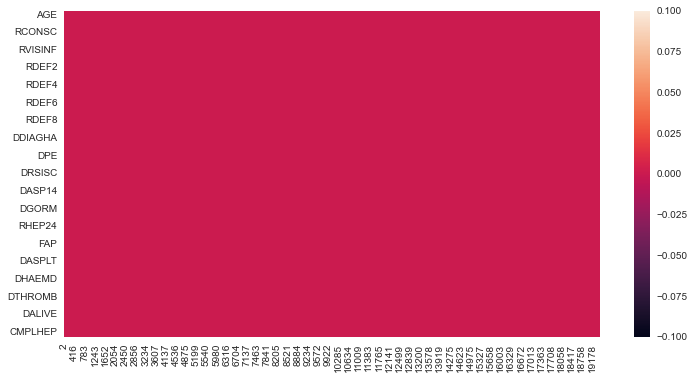

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(data_selected.isnull().transpose())
plt.show()

In [42]:
# Early saving dataset without processing for data visualization of raw data
data_selected.to_csv('dataset/Cleaned_data3.csv', index=False)